# Importing the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

loading the data from csv file to pandas dataframe

In [52]:
train_dataset = pd.read_csv('C:/Users/Arpit/Desktop/Dell/Training_Data.csv')

In [53]:
# inspecting the first 5 rows of the dataframe
train_dataset.head()

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,20,7,56,26,15.0,FHD,Non-Touch,Laptop,IND,187998.426
1,42,16,23,28,15.0,HD+,Non-Touch,Laptop,AUS,43648.605
2,20,15,52,19,17.0,FHD,Non-Touch,Laptop,IND,121702.840
3,20,3,7,19,15.0,FHD,Non-Touch,Laptop,IND,132800.976
4,25,15,54,19,10.0,FHD,Non-Touch,Desktop,AUS,66139.500


In [54]:
# checking the number of rows and columns
train_dataset.shape

(3385, 10)

In [55]:
# getting some information about the dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           3385 non-null   int64  
 1   RAM           3385 non-null   int64  
 2   Storage       3385 non-null   int64  
 3   GPU           3385 non-null   int64  
 4   ScreenSize    3385 non-null   float64
 5   ScreenType    3385 non-null   object 
 6   TouchType     3385 non-null   object 
 7   Form          3385 non-null   object 
 8   Region        3385 non-null   object 
 9   Price in INR  3385 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 264.6+ KB


In [56]:
# checking the distribution of categorical data
print(train_dataset.ScreenType.value_counts())
print(train_dataset.TouchType.value_counts())
print(train_dataset.Form.value_counts())
print(train_dataset.Region.value_counts())

FHD     2552
UHD      302
HD+      221
QHD+     143
FHD+      62
HD        56
QHD       48
UHD+       1
Name: ScreenType, dtype: int64
Non-Touch    2789
Touch         596
Name: TouchType, dtype: int64
Laptop     2345
Desktop    1040
Name: Form, dtype: int64
FRA    1178
IND     613
AUS     597
CAN     233
CHN     191
GER     174
BRA     161
GBR     145
USA      93
Name: Region, dtype: int64


Encoding the Categorical Data

In [83]:
# encoding "ScreenType" Column
#train_dataset.replace({'ScreenType':{'FHD':0,'DT':1,'UHD':2,'HD+':3,'QHD+':4,'FHD+':5,'HD':6,'QHD':7,'UHD+':8}},inplace=True)

# encoding "TouchType" Column
#train_dataset.replace({'TouchType':{'Non-Touch':0,'DT':1,'Touch':2}},inplace=True)

# encoding "Form" Column
#train_dataset.replace({'Form':{'Desktop':1,'Laptop':2,'0':0}},inplace=True)

# encoding "Form" Column
#train_dataset.replace({'Region':{'FRA':0,'IND':1,'AUS':2,'CAN':3,'CHN':4,'GER':5,'BRA':6,'GBR':7,'USA':8}},inplace=True)


In [57]:
dummies1 = pd.get_dummies(train_dataset.ScreenType)
dummies2 = pd.get_dummies(train_dataset.TouchType)
dummies3 = pd.get_dummies(train_dataset.Form)
dummies4 = pd.get_dummies(train_dataset.Region)

In [58]:
dummies4

,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3380,0,0,0,1,0,0,0,0,0
3381,0,0,0,0,1,0,0,0,0
3382,0,0,0,0,1,0,0,0,0
3383,0,0,0,0,0,1,0,0,0


In [59]:
train_dataset_dum = pd.concat([train_dataset, dummies1, dummies2, dummies3, dummies4], axis = 'columns')

In [60]:
train_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,20,7,56,26,15.0,FHD,Non-Touch,Laptop,IND,1.879984e+05,...,1,0,0,0,0,0,0,0,1,0
1,42,16,23,28,15.0,HD+,Non-Touch,Laptop,AUS,4.364861e+04,...,1,1,0,0,0,0,0,0,0,0
2,20,15,52,19,17.0,FHD,Non-Touch,Laptop,IND,1.217028e+05,...,1,0,0,0,0,0,0,0,1,0
3,20,3,7,19,15.0,FHD,Non-Touch,Laptop,IND,1.328010e+05,...,1,0,0,0,0,0,0,0,1,0
4,25,15,54,19,10.0,FHD,Non-Touch,Desktop,AUS,6.613950e+04,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,20,15,23,28,14.0,HD+,Non-Touch,Laptop,CHN,1.677274e+06,...,1,0,0,0,1,0,0,0,0,0
3381,6,15,23,27,10.0,FHD,Non-Touch,Desktop,FRA,1.351325e+06,...,0,0,0,0,0,1,0,0,0,0
3382,20,7,23,14,15.0,FHD,Non-Touch,Laptop,FRA,4.909775e+06,...,1,0,0,0,0,1,0,0,0,0
3383,20,7,70,14,10.0,FHD,Non-Touch,Desktop,GBR,3.222495e+06,...,0,0,0,0,0,0,1,0,0,0


In [61]:
train_dataset_dum.drop(['Price in INR', 'ScreenType','TouchType','Form','Region'], axis = 'columns', inplace = True)

In [62]:
train_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,FHD,FHD+,HD,HD+,QHD,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,20,7,56,26,15.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,42,16,23,28,15.0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
2,20,15,52,19,17.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,20,3,7,19,15.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,25,15,54,19,10.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,20,15,23,28,14.0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3381,6,15,23,27,10.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3382,20,7,23,14,15.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3383,20,7,70,14,10.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
# Dropping UHD+, Touch, Desktop, USA
train_dataset_dum.drop(['UHD+', 'Touch','Desktop','USA'], axis = 'columns', inplace = True)

In [64]:
train_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,FHD,FHD+,HD,HD+,QHD,...,Non-Touch,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND
0,20,7,56,26,15.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,42,16,23,28,15.0,0,0,0,1,0,...,1,1,1,0,0,0,0,0,0,0
2,20,15,52,19,17.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,20,3,7,19,15.0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,25,15,54,19,10.0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3380,20,15,23,28,14.0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
3381,6,15,23,27,10.0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3382,20,7,23,14,15.0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3383,20,7,70,14,10.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [65]:
X= train_dataset_dum
Y= train_dataset['Price in INR']

In [85]:
# X = train_dataset.drop(['Price in INR','ScreenSize','Form','TouchType'],axis=1)
# Y = train_dataset['Price in INR']

In [15]:
# print(X)

In [16]:
# print(Y)

# Model Training

Linear Regression

In [66]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [67]:
lin_reg_model.fit(X,Y)

LinearRegression()

Model Evaluation

In [68]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X) 

In [69]:
# R squared Error
error_score = metrics.r2_score(Y, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.20277476375513692


Visualize the actual prices and Predicted prices

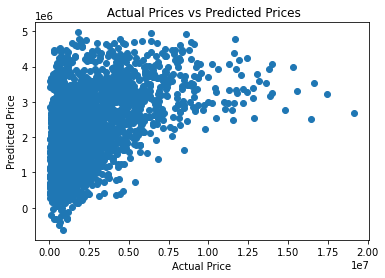

In [70]:
plt.scatter(Y, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [71]:
type(training_data_prediction)

numpy.ndarray

In [21]:
pd.DataFrame(training_data_prediction).to_csv("C:/Users/Arpit/Desktop/Dell/TrainOutput.csv")

# Data Validation 

In [96]:
valid_dataset = pd.read_csv('C:/Users/Arpit/Desktop/Dell/Valid_Data.csv')

In [97]:
# inspecting the first 5 rows of the dataframe
valid_dataset.head()

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR
0,10,15,31,12,10,FHD,Non-Touch,Desktop,FRA,1524828.949
1,22,7,54,32,15,QHD+,Non-Touch,Laptop,IND,6898343.130
2,42,15,41,5,13,QHD+,Touch,Laptop,AUS,3826942.560
3,25,15,70,5,23,FHD,Touch,Desktop,FRA,1604383.956
4,20,7,52,2,10,FHD,Non-Touch,Desktop,AUS,4827658.605


In [98]:
# getting some information about the dataset
valid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CPU           529 non-null    int64  
 1   RAM           529 non-null    int64  
 2   Storage       529 non-null    int64  
 3   GPU           529 non-null    int64  
 4   ScreenSize    529 non-null    int64  
 5   ScreenType    529 non-null    object 
 6   TouchType     529 non-null    object 
 7   Form          529 non-null    object 
 8   Region        529 non-null    object 
 9   Price in INR  529 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 41.5+ KB


In [99]:
# checking the distribution of categorical data
print(valid_dataset.ScreenType.value_counts())
print(valid_dataset.TouchType.value_counts())
print(valid_dataset.Form.value_counts())
print(valid_dataset.Region.value_counts())

FHD     399
UHD      50
HD+      34
QHD+     18
HD       11
QHD       9
FHD+      7
UHD+      1
Name: ScreenType, dtype: int64
Non-Touch    427
Touch        102
Name: TouchType, dtype: int64
Laptop     367
Desktop    162
Name: Form, dtype: int64
FRA    204
IND     84
AUS     82
CHN     36
CAN     35
GBR     34
GER     23
BRA     17
USA     14
Name: Region, dtype: int64


In [98]:
# encoding "ScreenType" Column
# valid_dataset.replace({'ScreenType':{'FHD':0,'DT':1,'UHD':2,'HD+':3,'QHD+':4,'FHD+':5,'HD':6,'QHD':7,'UHD+':8}},inplace=True)

# encoding "TouchType" Column
# valid_dataset.replace({'TouchType':{'Non-Touch':0,'DT':1,'Touch':2}},inplace=True)

# encoding "Form" Column
# valid_dataset.replace({'Form':{'Desktop':1,'Laptop':2,'0':0}},inplace=True)

# encoding "Form" Column
# valid_dataset.replace({'Region':{'FRA':0,'IND':1,'AUS':2,'CAN':3,'CHN':4,'GER':5,'BRA':6,'GBR':7,'USA':8}},inplace=True)

In [100]:
dummiesScTy = pd.get_dummies(valid_dataset.ScreenType)
dummiesToTy = pd.get_dummies(valid_dataset.TouchType)
dummiesFo = pd.get_dummies(valid_dataset.Form)
dummiesRe = pd.get_dummies(valid_dataset.Region)

In [101]:
valid_dataset_dum = pd.concat([valid_dataset, dummiesScTy, dummiesToTy, dummiesFo, dummiesRe], axis = 'columns')

In [102]:
valid_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,Price in INR,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,10,15,31,12,10,FHD,Non-Touch,Desktop,FRA,1524828.949,...,0,0,0,0,0,1,0,0,0,0
1,22,7,54,32,15,QHD+,Non-Touch,Laptop,IND,6898343.130,...,1,0,0,0,0,0,0,0,1,0
2,42,15,41,5,13,QHD+,Touch,Laptop,AUS,3826942.560,...,1,1,0,0,0,0,0,0,0,0
3,25,15,70,5,23,FHD,Touch,Desktop,FRA,1604383.956,...,0,0,0,0,0,1,0,0,0,0
4,20,7,52,2,10,FHD,Non-Touch,Desktop,AUS,4827658.605,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,10,15,23,5,10,FHD,Non-Touch,Desktop,GBR,1909040.105,...,0,0,0,0,0,0,1,0,0,0
525,5,13,41,28,12,HD+,Non-Touch,Laptop,AUS,1745751.000,...,1,1,0,0,0,0,0,0,0,0
526,10,15,55,34,10,FHD,Non-Touch,Desktop,FRA,2171380.260,...,0,0,0,0,0,1,0,0,0,0
527,20,15,54,18,10,FHD,Non-Touch,Desktop,FRA,3680184.767,...,0,0,0,0,0,1,0,0,0,0


In [103]:
valid_dataset_dum.drop(['Price in INR', 'ScreenType','TouchType','Form','Region'], axis = 'columns', inplace = True)

In [104]:
valid_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,FHD,FHD+,HD,HD+,QHD,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,10,15,31,12,10,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,22,7,54,32,15,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,42,15,41,5,13,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,25,15,70,5,23,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20,7,52,2,10,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,10,15,23,5,10,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
525,5,13,41,28,12,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
526,10,15,55,34,10,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
527,20,15,54,18,10,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
# Dropping UHD+, Touch, Desktop, USA
valid_dataset_dum.drop(['UHD+', 'Touch','Desktop','USA'], axis = 'columns', inplace = True)

In [106]:
X_valid= valid_dataset_dum
Y_valid= valid_dataset['Price in INR']

In [107]:
# prediction on Training data
valid_data_prediction = lin_reg_model.predict(X_valid)

In [108]:
# R squared Error
error_score_valid = metrics.r2_score(Y_valid, valid_data_prediction)
print("R squared Error : ", error_score_valid)

R squared Error :  0.16792793355099356


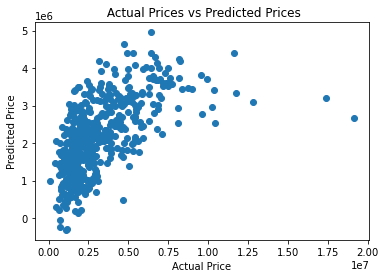

In [109]:
plt.scatter(Y_valid, valid_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [54]:
pd.DataFrame(valid_data_prediction).to_csv("C:/Users/Arpit/Desktop/Dell/ValidOutput.csv")

# LASSO Regression

In [110]:
# loading the linear regression model
lass_reg_model = Lasso()

In [111]:
lass_reg_model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6272708585041786.0, tolerance: 1608141378631.9236
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [112]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X)

In [113]:
# R squared Error
error_score_latrain = metrics.r2_score(Y, training_data_prediction)
print("R squared Error : ", error_score_latrain)

R squared Error :  0.20276627164476713


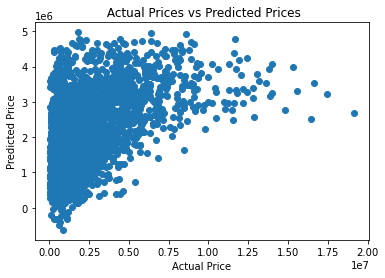

In [114]:
plt.scatter(Y, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [115]:
# prediction on Training data
valid_data_prediction = lass_reg_model.predict(X_valid)

In [116]:
# R squared Error
error_score_lavalid = metrics.r2_score(Y_valid, valid_data_prediction)
print("R squared Error : ", error_score_lavalid)

R squared Error :  0.16757128853017


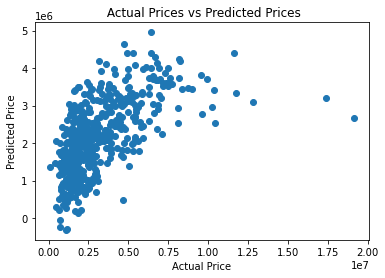

In [117]:
plt.scatter(Y_valid, valid_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [57]:
pd.DataFrame(valid_data_prediction).to_csv("C:/Users/Arpit/Desktop/Dell/ValidOutput2.csv")

# Test Data

In [119]:
test_dataset = pd.read_csv('C:/Users/Arpit/Desktop/Dell/Test_Data.csv')

In [120]:
test_dataset

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region
0,27,13,41,28,13,UHD,Non-Touch,Laptop,GBR
1,41,3,54,5,15,UHD,Non-Touch,Laptop,FRA
2,27,14,23,28,15,UHD,Non-Touch,Laptop,FRA
3,41,15,41,19,10,FHD,Non-Touch,Desktop,BRA
4,33,1,70,18,10,FHD,Non-Touch,Desktop,FRA
...,...,...,...,...,...,...,...,...,...
821,41,11,4,28,15,FHD,Non-Touch,Laptop,AUS
822,27,15,56,28,13,FHD,Non-Touch,Laptop,GER
823,31,7,52,8,10,FHD,Non-Touch,Desktop,FRA
824,27,13,23,28,21,UHD,Touch,Desktop,FRA


In [121]:
# checking the distribution of categorical data
print(test_dataset.ScreenType.value_counts())
print(test_dataset.TouchType.value_counts())
print(test_dataset.Form.value_counts())
print(test_dataset.Region.value_counts())

FHD     602
HD+      78
UHD      70
QHD+     38
HD       19
FHD+     10
QHD       9
Name: ScreenType, dtype: int64
Non-Touch    709
Touch        117
Name: TouchType, dtype: int64
Laptop     559
Desktop    267
Name: Form, dtype: int64
FRA    279
IND    146
AUS    115
CAN     84
GER     68
BRA     52
CHN     38
GBR     30
USA     14
Name: Region, dtype: int64


In [122]:
dummiesSctest = pd.get_dummies(test_dataset.ScreenType)
dummiesTotest = pd.get_dummies(test_dataset.TouchType)
dummiesFotest = pd.get_dummies(test_dataset.Form)
dummiesRetest = pd.get_dummies(test_dataset.Region)

In [123]:
test_dataset_dum = pd.concat([test_dataset, dummiesSctest, dummiesTotest, dummiesFotest, dummiesRetest], axis = 'columns')

In [124]:
test_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,ScreenType,TouchType,Form,Region,FHD,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,27,13,41,28,13,UHD,Non-Touch,Laptop,GBR,0,...,1,0,0,0,0,0,1,0,0,0
1,41,3,54,5,15,UHD,Non-Touch,Laptop,FRA,0,...,1,0,0,0,0,1,0,0,0,0
2,27,14,23,28,15,UHD,Non-Touch,Laptop,FRA,0,...,1,0,0,0,0,1,0,0,0,0
3,41,15,41,19,10,FHD,Non-Touch,Desktop,BRA,1,...,0,0,1,0,0,0,0,0,0,0
4,33,1,70,18,10,FHD,Non-Touch,Desktop,FRA,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,41,11,4,28,15,FHD,Non-Touch,Laptop,AUS,1,...,1,1,0,0,0,0,0,0,0,0
822,27,15,56,28,13,FHD,Non-Touch,Laptop,GER,1,...,1,0,0,0,0,0,0,1,0,0
823,31,7,52,8,10,FHD,Non-Touch,Desktop,FRA,1,...,0,0,0,0,0,1,0,0,0,0
824,27,13,23,28,21,UHD,Touch,Desktop,FRA,0,...,0,0,0,0,0,1,0,0,0,0


In [125]:
test_dataset_dum.drop(['ScreenType','TouchType','Form','Region'], axis='columns', inplace = True)

In [126]:
test_dataset_dum

,CPU,RAM,Storage,GPU,ScreenSize,FHD,FHD+,HD,HD+,QHD,...,Laptop,AUS,BRA,CAN,CHN,FRA,GBR,GER,IND,USA
0,27,13,41,28,13,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,41,3,54,5,15,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,27,14,23,28,15,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,41,15,41,19,10,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,33,1,70,18,10,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,41,11,4,28,15,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
822,27,15,56,28,13,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
823,31,7,52,8,10,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
824,27,13,23,28,21,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
test_dataset_dum.columns

Index(['CPU', 'RAM', 'Storage', 'GPU', 'ScreenSize', 'FHD', 'FHD+', 'HD',
       'HD+', 'QHD', 'QHD+', 'UHD', 'Non-Touch', 'Touch', 'Desktop', 'Laptop',
       'AUS', 'BRA', 'CAN', 'CHN', 'FRA', 'GBR', 'GER', 'IND', 'USA'],
      dtype='object')

In [128]:
train_dataset_dum.columns

Index(['CPU', 'RAM', 'Storage', 'GPU', 'ScreenSize', 'FHD', 'FHD+', 'HD',
       'HD+', 'QHD', 'QHD+', 'UHD', 'Non-Touch', 'Laptop', 'AUS', 'BRA', 'CAN',
       'CHN', 'FRA', 'GBR', 'GER', 'IND'],
      dtype='object')

In [129]:
test_dataset_dum.drop(['Touch','Desktop','USA'], axis = 'columns', inplace = True)

In [130]:
test_dataset_dum.columns

Index(['CPU', 'RAM', 'Storage', 'GPU', 'ScreenSize', 'FHD', 'FHD+', 'HD',
       'HD+', 'QHD', 'QHD+', 'UHD', 'Non-Touch', 'Laptop', 'AUS', 'BRA', 'CAN',
       'CHN', 'FRA', 'GBR', 'GER', 'IND'],
      dtype='object')

In [131]:
X_test = test_dataset_dum

In [132]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [133]:
pd.DataFrame(test_data_prediction).to_csv("C:/Users/Arpit/Desktop/Dell/testOutput.csv")